In [42]:
import sklearn
import sklearn.linear_model
import sklearn.metrics
from sklearn.metrics import log_loss
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn')
import pandas as pd

In [43]:
x_tr = np.loadtxt('./data_digits_8_vs_9_noisy/x_train.csv', delimiter=',', skiprows=1)
y_tr = np.loadtxt('./data_digits_8_vs_9_noisy/y_train.csv', delimiter=',', skiprows=1)
x_te = np.loadtxt('./data_digits_8_vs_9_noisy/x_test.csv', delimiter=',', skiprows=1)
y_te = np.loadtxt('./data_digits_8_vs_9_noisy/y_test.csv', delimiter=',', skiprows=1)

In [44]:
from sklearn.linear_model import LogisticRegression
C_grid = np.logspace(-9, 6, 31)
C_list = list()
ll_list = list()
acc_list = list()

#goes through the different possible C values and adds the log loss for each to a list
for C in C_grid:
    lrc = LogisticRegression(C = C, solver='liblinear').fit(x_tr, y_tr)
    C_list.append(C)
    ppc = lrc.predict_proba(x_te)
    llc = log_loss(y_te, ppc)
    ll_list.append(llc)
    acc_list.append(lrc.score(x_te, y_te))

#finds the C value with the lowest log loss
min_loss = min(ll_list)
min_index = ll_list.index(min_loss)
min_C = C_list[min_index]
min_acc = acc_list[min_index]

#prints the C value with the lowest log loss and the accuracy score for that C
print("Best C: %.4f" % min_C)
print("Accuracy score: %.4f" % min_acc)

Best C: 0.0316
Accuracy score: 0.9672


In [45]:
#uses the best C from the previous step in a logistic regression
from sklearn.linear_model import LogisticRegression
lrbest = LogisticRegression(C = min_C, solver='liblinear').fit(x_tr, y_tr)
ppbest = lrbest.predict_proba(x_te)

In [46]:
def calc_confusion_matrix_for_threshold(ytrue_N, yproba1_N, thresh = .5):
    cm = sklearn.metrics.confusion_matrix(ytrue_N, yproba1_N >= thresh)
    cm_df = pd.DataFrame(data=cm, columns=[0, 1], index=[0, 1])
    cm_df.columns.name = 'Predicted'
    cm_df.index.name = 'True'
    return cm_df

print(calc_confusion_matrix_for_threshold(y_te, ppbest[:,1]))

Predicted    0    1
True               
0          942   32
1           33  976


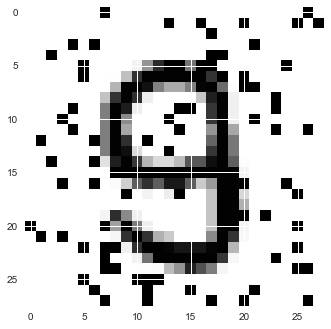

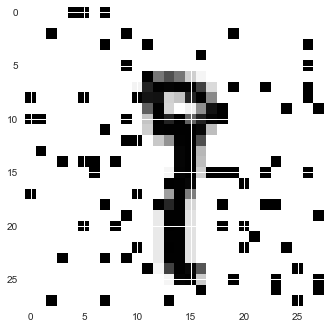

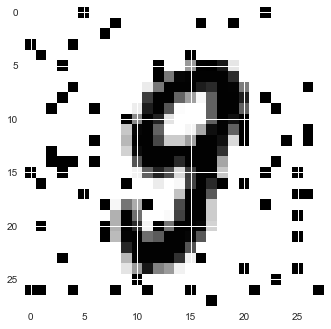

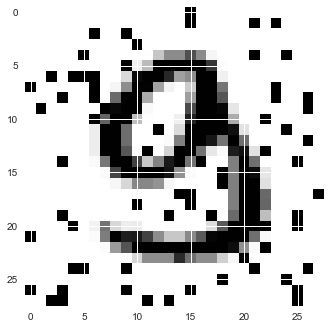

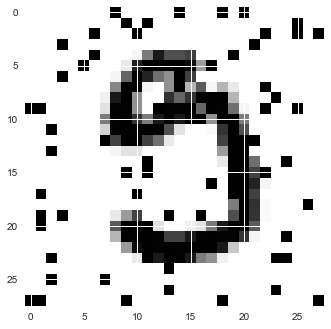

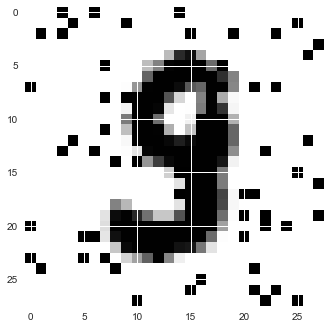

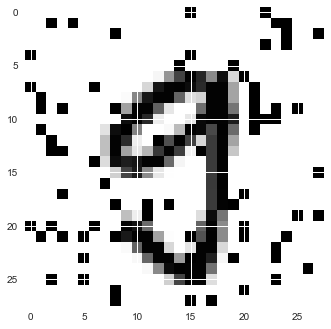

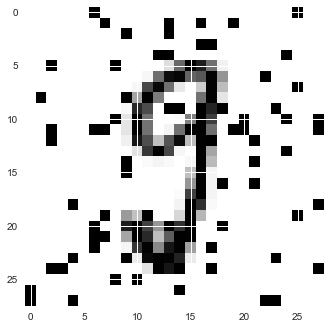

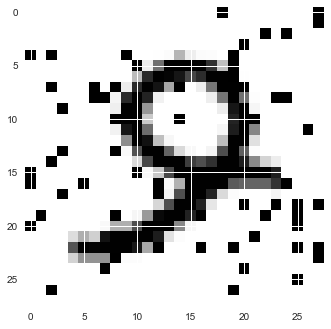

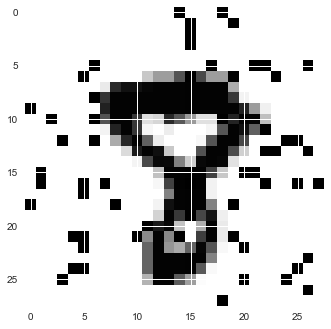

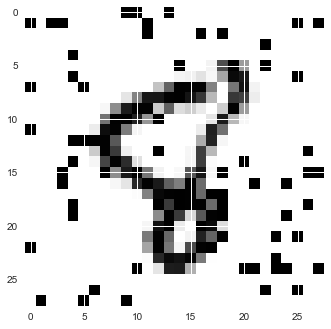

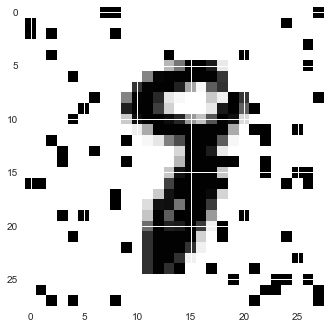

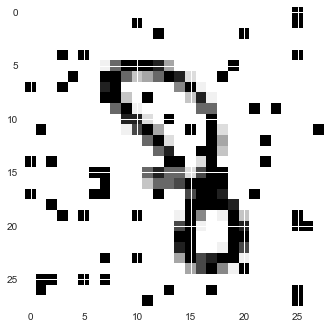

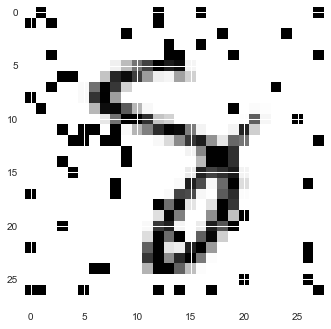

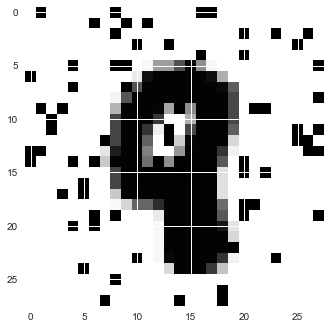

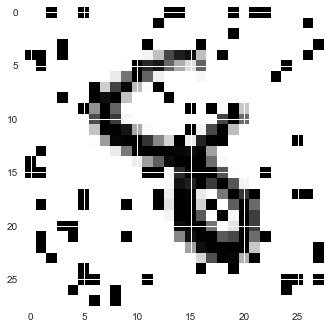

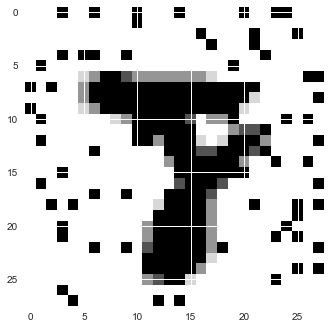

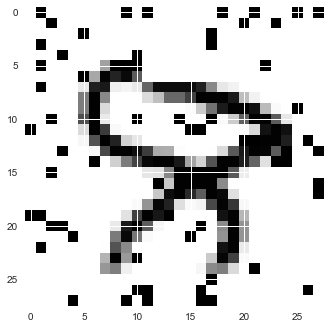

In [47]:
import matplotlib
from matplotlib import pyplot
from matplotlib.backends.backend_pdf import PdfPages

falseeight = list()
falsenine = list()
weightlist = list()
prob = ppbest[:,1]
problist = list(prob)
length = len(problist)
for i in range(length):
    if(y_te[i] == 1 and prob[i] < .5):
        falseeight.append(x_te[i])
    elif(y_te[i] == 0 and prob[i] > .5):
        falsenine.append(x_te[i])
        
#prints out 9 images that were actually 9s but were identified as an 8
for i in range(9):
    pyplot.imshow(falseeight[i].reshape(28,28), cmap = 'Greys', vmin=0.0, vmax=1.0)
    pyplot.show()

#prints out 9 images that were actually 8s but were identified as an 9
for i in range(9):
    pyplot.imshow(falsenine[i].reshape(28,28), cmap = 'Greys', vmin=0.0, vmax=1.0)
    pyplot.show()


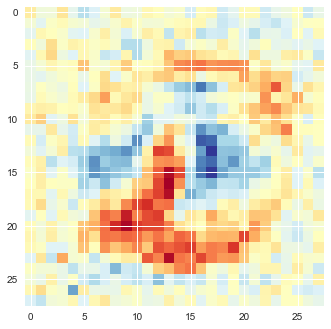

Min C: 
0.03162277660168379


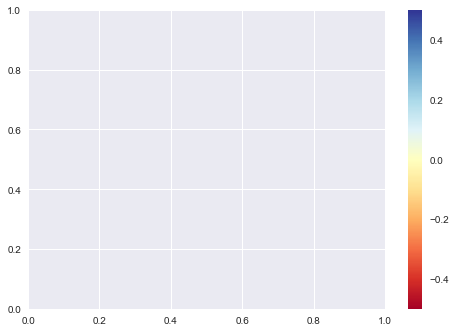

In [48]:
from matplotlib import pyplot
lrbest = LogisticRegression(C = min_C, solver='liblinear').fit(x_tr, y_tr)
weights = lrbest.coef_
plot = pyplot.imshow(weights.reshape(28,28), cmap = 'RdYlBu', vmin=-0.5, vmax=0.5)
pyplot.show()
#shows the relationship between colors and weights
pyplot.colorbar(plot)
#shows which pixels correspond to an 8 (they have a negative weight) and which pixels correspond to a 9 (they have a positive weight)

In [49]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from sklearn import preprocessing
C_grid2 = np.logspace(-9, 6, 31)

x_train = np.loadtxt('./data_sneaker_vs_sandal/x_train.csv', delimiter=',', skiprows=1)
y_train = np.loadtxt('./data_sneaker_vs_sandal/y_train.csv', delimiter=',', skiprows=1)
x_test = np.loadtxt('./data_sneaker_vs_sandal/x_test.csv', delimiter=',', skiprows=1)

x_tr = x_train[:1200, ]
y_tr = y_train[:1200, ]
x_va = x_train[1201:,]
y_va = y_train[1201:,]
ll_list2 = list()
C_list2 = list()

#finds the C value that minimizes log loss
for C2 in C_grid2:
    lrsandal = LogisticRegression(C = C2, solver='liblinear').fit(x_tr, y_tr)
    ppsandal = lrsandal.predict_proba(x_va)
    llsandal = log_loss(y_va, ppsandal)
    ll_list2.append(llsandal)
    C_list2.append(C2)
    
min_loss2 = min(ll_list2)
min_index2 = ll_list2.index(min_loss2)
min_C2 = C_list2[min_index2]

print("Best C: %.4f" % min_C2)

Best C: 1.0000


Best C-value for LR with 2-feature data: 1.000
Validation set log-loss at best C-value: 0.1491


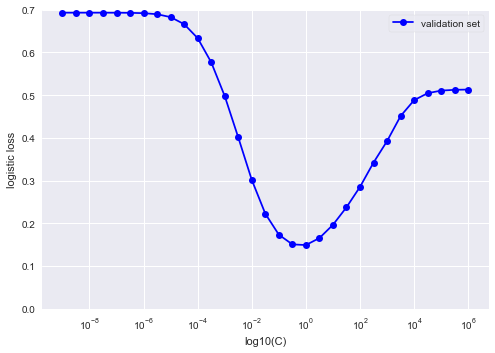

In [50]:
plt.xlabel('log10(C)');
plt.ylabel('logistic loss');
plt.ylim([0.0, 0.7]);
plt.plot(C_grid, ll_list2, label="validation set", color= 'blue', marker='o')   
matplotlib.pyplot.xscale('log')
plt.legend(loc='upper right', frameon=True)

print("Best C-value for LR with 2-feature data: %.3f" % min_C2)
print("Validation set log-loss at best C-value: %.4f" % min_loss2)

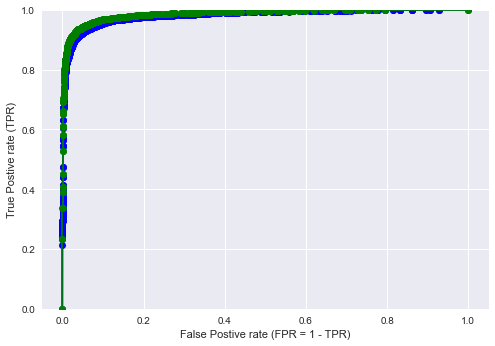

In [51]:
import sklearn.metrics

#compares the true positive rate of the original logistic regression vs the best logistic regression
lrlast = LogisticRegression(C = C2, solver='liblinear').fit(x_tr, y_tr)
pplast = lrlast.predict_proba(x_va)

plt.ylim([0, 1]);
plt.xlabel("False Postive rate (FPR = 1 - TPR)");
plt.ylabel("True Postive rate (TPR)");
    
fpr3, tpr3, thr3 = sklearn.metrics.roc_curve(y_va, pplast[:,1])
plt.plot(fpr3, tpr3, label="Original Logistic Regression", color= 'blue', marker='o')

lrbest = LogisticRegression(C = min_C2, solver='liblinear').fit(x_tr, y_tr)
ppbest = lrbest.predict_proba(x_va)

fpr4, tpr4, thr4 = sklearn.metrics.roc_curve(y_va, ppbest[:,1])
plt.plot(fpr4, tpr4, label="Best C Logistic Regression", color= 'green', marker='o')

In [52]:
#reads in data for sneaker vs sandal
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from sklearn import preprocessing
C_grid2 = np.logspace(-9, 6, 31)

x_train = np.loadtxt('./data_sneaker_vs_sandal/x_train.csv', delimiter=',', skiprows=1)
y_train = np.loadtxt('./data_sneaker_vs_sandal/y_train.csv', delimiter=',', skiprows=1)
x_test = np.loadtxt('./data_sneaker_vs_sandal/x_test.csv', delimiter=',', skiprows=1)

In [53]:
#saves output of logistic regression to yprobal_test.txt
def fit_lr(xtrain, ytrain, xtest):
    finallr = LogisticRegression(C = 1, solver='liblinear').fit(xtrain, ytrain)

    yproba1_test = finallr.predict_proba(xtest)[:, 1]
    np.savetxt('yproba1_test.txt', yproba1_test)

In [54]:
shape = x_test.shape
rows = shape[0]
cols = shape[1]
aug_rows = rows * 2

#augments the training data by adding the data from the flipped images
aug_x_train = np.empty([aug_rows, cols])
aug_y_train = np.empty(aug_rows)

for i in range(rows):
    for j in range(cols):
        aug_x_train[i,j] = x_train[i,j]
        aug_y_train[i] = y_train[i]
        
#create new array with augmented training data
for i in range(rows,aug_rows,1):
    temp_vector = x_train[i-rows]
    temp_2d = temp_vector.reshape(28,28)
    temp_2d_ud = np.flipud(temp_2d)
    temp_vector_ud = temp_2d_ud.reshape(784)
    for j in range(cols):
        aug_x_train[i,j] = temp_vector_ud[j]
    aug_y_train[i] = y_train[i-rows]
    
shape = aug_x_train.shape
num_rows = shape[0]
black_pixels = 0
new_xtr = aug_x_train.copy()
new_col = np.zeros((4000,1))

new_xtr = np.append(new_xtr, new_col, axis=1)
for i in range(num_rows):
    black_pixels = 0
    for j in range(len(new_xtr[i]) - 1):
            black_pixels += new_xtr[i][j]
    new_xtr[i][784] = black_pixels


new_xte = x_test.copy()
new_col = np.zeros((2000,1))

#add the number of black pixels as a feature
new_xte = np.append(new_xte, new_col, axis=1)
for i in range(2000):
    black_pixels = 0
    for j in range(len(new_xte[i]) - 1):
            black_pixels += new_xte[i][j]
    new_xte[i][784] = black_pixels

#set threshold to 0.17
threshold = 0.17
new_xtr = new_xtr > threshold
new_xte = new_xte > threshold

fit_lr(new_xtr, aug_y_train, new_xte)